# Multilinear regression - step-by-step statistical methodology of model building

In [79]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [80]:
wine_quality = pd.read_csv("winequality-red.csv",sep=';')

In [81]:
# Step for converting white space in columns to _ value for better handling
wine_quality.rename(columns=lambda x: x.replace(" ", "_"),inplace=True)

In [82]:
wine_quality.head().T

,0,1,2,3,4
fixed_acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile_acidity,0.7000,0.8800,0.760,0.280,0.7000
citric_acid,0.0000,0.0000,0.040,0.560,0.0000
residual_sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free_sulfur_dioxide,11.0000,25.0000,15.000,17.000,11.0000
total_sulfur_dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [83]:
eda_colnms = [ 'volatile_acidity', 'chlorides', 'sulphates','alcohol','quality']

/Users/abhijeetanand/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


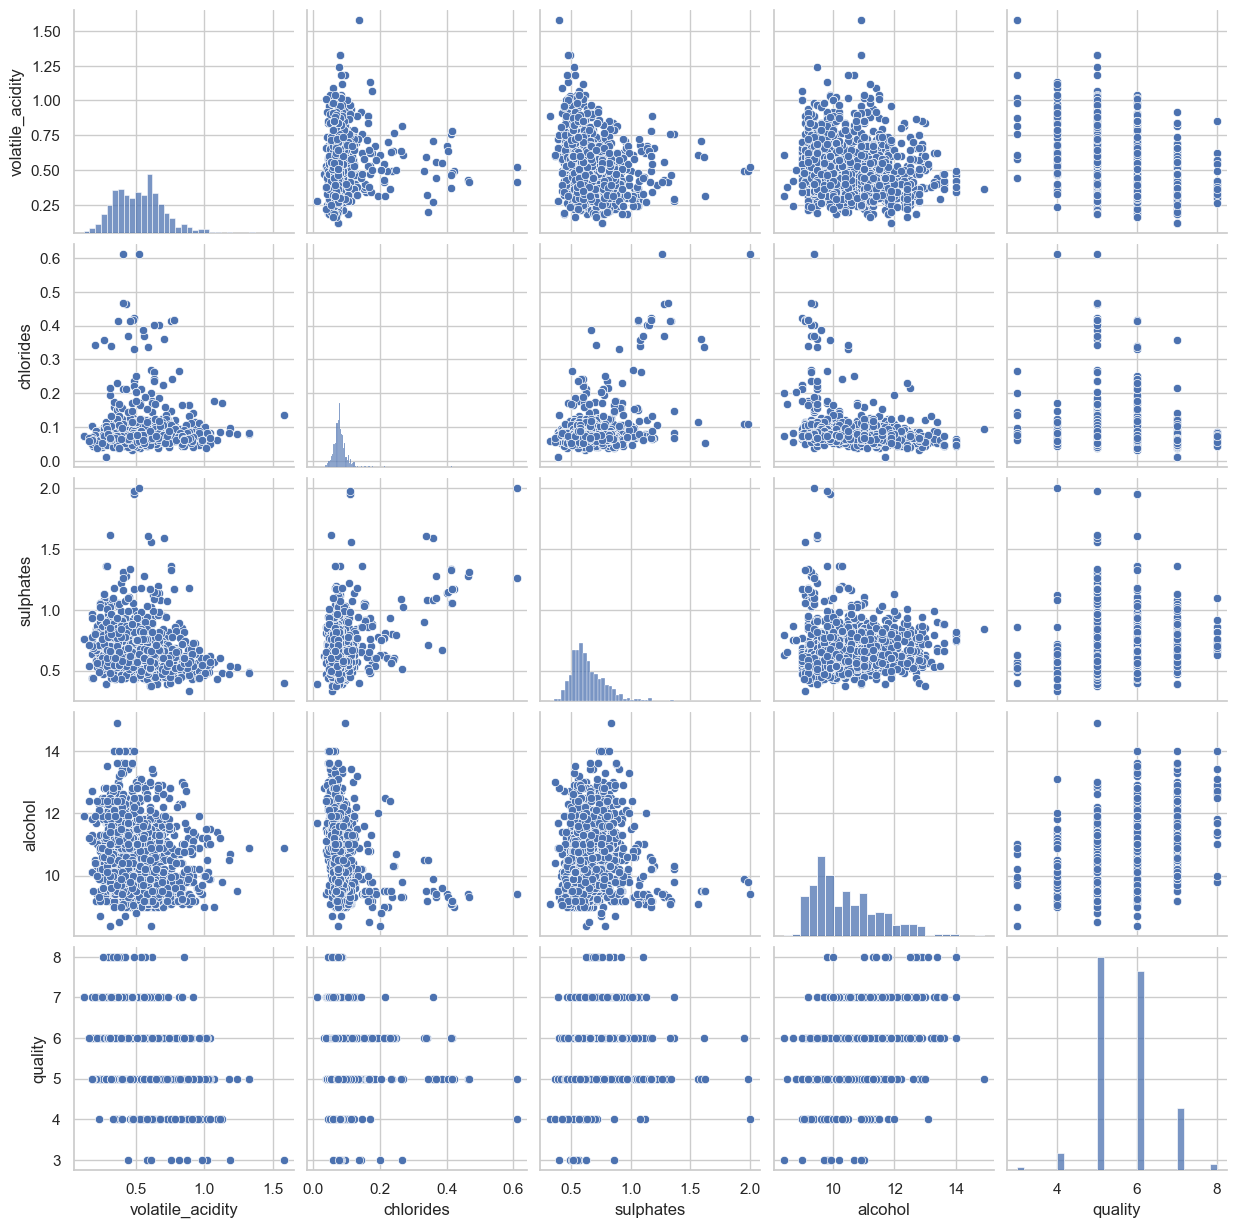

In [84]:
# Plots - pair plots
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(wine_quality[eda_colnms],size = 2.5,x_vars= eda_colnms, y_vars= eda_colnms)
plt.show()

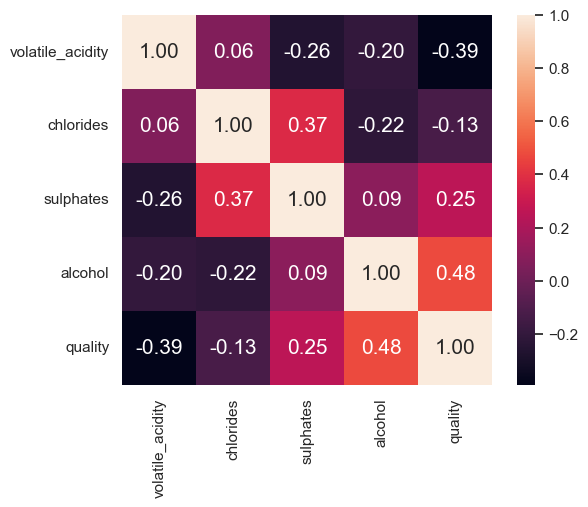

In [85]:
# Correlation coefficients
corr_mat = np.corrcoef(wine_quality[eda_colnms].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 15}, yticklabels=eda_colnms, xticklabels=eda_colnms)
plt.show()

# Backward and forward selection

Iteration:1

In [86]:
def regression_stats(wine_quality,colnms):
    
    
    pdx = wine_quality[colnms]
    pdy = wine_quality["quality"]
    
    x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size = 0.7, random_state = 42)
    
    x_train_new = sm.add_constant(x_train)
    x_test_new = sm.add_constant(x_test)
    full_mod = sm.OLS(y_train,x_train_new)
    
    full_res = full_mod.fit()
    print ("\n \n",full_res.summary())
    
    print ("\nVariance Inflation Factor")
    cnames = x_train.columns
    for i in np.arange(0,len(cnames)):
        xvars = list(cnames)
        yvar = xvars.pop(i)
        mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
        res = mod.fit()
        vif = 1/(1-res.rsquared)
        print (yvar,round(vif,3))
    

In [87]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
regression_stats(wine_quality,colnms)


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          8.34e-100
Time:                        18:55:03   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9

# Removing statistical insignificant variable one by one

Iteration:2

Removing 'residual_sugar', since it doesnot contain any statistical significance

In [88]:
colnms.remove('residual_sugar')
regression_stats(wine_quality,colnms)


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     62.62
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          1.12e-100
Time:                        18:55:03   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2229.
Df Residuals:                    1108   BIC:                             2284.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3

Iteration:3

Removing 'density', since it doesnot contain any statistical significance

In [89]:
colnms.remove('density')
regression_stats(wine_quality,colnms)


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     69.62
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          1.40e-101
Time:                        18:55:03   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2227.
Df Residuals:                    1109   BIC:                             2277.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0

Iteration:4

Removing 'fixed_acidity', since it doesnot contain any statistical significance

In [90]:
colnms.remove('fixed_acidity')
regression_stats(wine_quality,colnms)


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     78.33
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          1.77e-102
Time:                        18:55:03   Log-Likelihood:                -1103.8
No. Observations:                1119   AIC:                             2226.
Df Residuals:                    1110   BIC:                             2271.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2

Iteration:5

Removing 'citric_acid'', since it doesnot contain any statistical significance

In [91]:
colnms.remove('citric_acid')
regression_stats(wine_quality,colnms)


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          4.31e-103
Time:                        18:55:03   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9

Considering the below variable for final model selection since p< 0.05

# Prediction of data

In [92]:
 # Prediction of data
y_pred = full_res.predict(x_test_new)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['y_pred']
pred_data = pd.DataFrame(y_pred_df['y_pred'])
y_test_new = pd.DataFrame(y_test)
y_test_new.reset_index(inplace=True)
pred_data['y_test'] = pd.DataFrame(y_test_new['quality'])

In [93]:
 # R-square calculation
rsqd = r2_score(y_test_new['quality'].tolist(),
y_pred_df['y_pred'].tolist())
print ("\nTest R-squared value:",round(rsqd,4))


Test R-squared value: 0.3505
